In [1]:
import numpy as np
import sympy as sp
from scipy.spatial import ConvexHull, Delaunay
from three_dim_cnp import *

In [2]:
proj_para = 1/np.sqrt(20) * np.array([
        [np.sqrt(5), 1, 1, 1, 1, 1],
        [1, np.sqrt(5), 1, -1, -1, 1],
        [1, 1, np.sqrt(5), 1, -1, -1],
        [1, -1, 1, np.sqrt(5), 1, -1],
        [1, -1, -1, 1, np.sqrt(5), 1],
        [1, 1, -1, -1, 1, np.sqrt(5)]
    ])
proj_perp = 1/np.sqrt(20) * np.array([
    [np.sqrt(5), -1, -1, -1, -1, -1],
    [-1, np.sqrt(5), -1, 1, 1, -1],
    [-1, -1, np.sqrt(5), -1, 1, 1],
    [-1, 1, -1, np.sqrt(5), -1, 1],
    [-1, 1, 1, -1, np.sqrt(5), -1],
    [-1, -1, 1, 1, -1, np.sqrt(5)]
])

In [3]:
sqrt5 = sp.sqrt(5)
proj_para_sympy = sp.Matrix(1/sp.sqrt(20) * sp.Matrix([
    [sqrt5, 1, 1, 1, 1, 1],
    [1, sqrt5, 1, -1, -1, 1],
    [1, 1, sqrt5, 1, -1, -1],
    [1, -1, 1, sqrt5, 1, -1],
    [1, -1, -1, 1, sqrt5, 1],
    [1, 1, -1, -1, 1, sqrt5]
]))
pos_eigvecs = proj_para_sympy.eigenvects()
pos_eigvecs

[(0,
  3,
  [Matrix([
   [1/2 - sqrt(5)/2],
   [              1],
   [1/2 - sqrt(5)/2],
   [              1],
   [              0],
   [              0]]),
   Matrix([
   [              -1],
   [-1/2 + sqrt(5)/2],
   [-1/2 + sqrt(5)/2],
   [               0],
   [               1],
   [               0]]),
   Matrix([
   [1/2 - sqrt(5)/2],
   [1/2 - sqrt(5)/2],
   [              1],
   [              0],
   [              0],
   [              1]])]),
 (1,
  3,
  [Matrix([
   [1/2 + sqrt(5)/2],
   [              1],
   [1/2 + sqrt(5)/2],
   [              1],
   [              0],
   [              0]]),
   Matrix([
   [              -1],
   [-sqrt(5)/2 - 1/2],
   [-sqrt(5)/2 - 1/2],
   [               0],
   [               1],
   [               0]]),
   Matrix([
   [1/2 + sqrt(5)/2],
   [1/2 + sqrt(5)/2],
   [              1],
   [              0],
   [              0],
   [              1]])])]

In [4]:
proj_perp_sympy = sp.Matrix(1/sp.sqrt(20) * sp.Matrix([
    [sqrt5, -1, -1, -1, -1, -1],
    [-1, sqrt5, -1, 1, 1, -1],
    [-1, -1, sqrt5, -1, 1, 1],
    [-1, 1, -1, sqrt5, -1, 1],
    [-1, 1, 1, -1, sqrt5, -1],
    [-1, -1, 1, 1, -1, sqrt5]
]))
neg_eigvecs = proj_perp_sympy.eigenvects()
neg_eigvecs

[(0,
  3,
  [Matrix([
   [1/2 + sqrt(5)/2],
   [              1],
   [1/2 + sqrt(5)/2],
   [              1],
   [              0],
   [              0]]),
   Matrix([
   [              -1],
   [-sqrt(5)/2 - 1/2],
   [-sqrt(5)/2 - 1/2],
   [               0],
   [               1],
   [               0]]),
   Matrix([
   [1/2 + sqrt(5)/2],
   [1/2 + sqrt(5)/2],
   [              1],
   [              0],
   [              0],
   [              1]])]),
 (1,
  3,
  [Matrix([
   [1/2 - sqrt(5)/2],
   [              1],
   [1/2 - sqrt(5)/2],
   [              1],
   [              0],
   [              0]]),
   Matrix([
   [              -1],
   [-1/2 + sqrt(5)/2],
   [-1/2 + sqrt(5)/2],
   [               0],
   [               1],
   [               0]]),
   Matrix([
   [1/2 - sqrt(5)/2],
   [1/2 - sqrt(5)/2],
   [              1],
   [              0],
   [              0],
   [              1]])])]

In [5]:
proj_neg = np.array([
        [0.5*(1-np.sqrt(5)), 1., 0.5*(1-np.sqrt(5)), 1. , 0., 0.],
        [-1., -0.5*(1-np.sqrt(5)), -0.5*(1-np.sqrt(5)), 0., 1., 0.],
        [0.5*(1-np.sqrt(5)), 0.5*(1-np.sqrt(5)), 1., 0., 0., 1.]
    ])
voronoi = gen_voronoi()

In [17]:
for i in range(3):
    print(np.dot(proj_neg[i], proj_neg[i]))
    print(np.dot(proj_neg[i], proj_neg[(i+1)%3]))
    print(np.dot(proj_neg[i], proj_neg[(i+2)%3]))
    print()

2.76393202250021
0.8541019662496846
-0.8541019662496846

2.76393202250021
0.8541019662496846
0.8541019662496846

2.76393202250021
-0.8541019662496846
0.8541019662496846



In [6]:
(proj_neg @ voronoi).shape

(3, 64)

In [7]:
cvxh = ConvexHull((proj_neg @ voronoi).T)
# Points forming the vertices of the convex hull
hull_points = (proj_neg @ voronoi).T[cvxh.vertices]
# Create a Delaunay triangulation object
del_obj = Delaunay(hull_points)
# Point to be tested
test_point = np.array([0, 0, 0])  # Replace x, y, z with the coordinates of your point

# Use find_simplex method to test if the point is inside the convex hull
if del_obj.find_simplex(test_point) >= 0:
    print("The point is inside the convex hull.")
else:
    print("The point is outside the convex hull.")

The point is inside the convex hull.


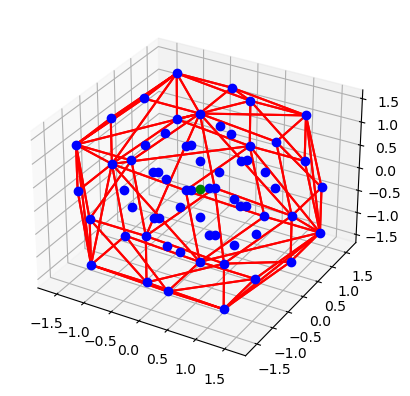

In [8]:
# visualize the above convex hull
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the convex hull
for simplex in cvxh.simplices:
    simplex = np.append(simplex, simplex[0])  # Here we cycle back to the first coordinate
    ax.plot((proj_neg @ voronoi).T[simplex, 0], (proj_neg @ voronoi).T[simplex, 1], (proj_neg @ voronoi).T[simplex, 2], 'r-')

# Plot the points
ax.plot((proj_neg @ voronoi).T[:, 0], (proj_neg @ voronoi).T[:, 1], (proj_neg @ voronoi).T[:, 2], 'bo')
ax.plot(test_point[0], test_point[1], test_point[2], 'go')

plt.show()


In [16]:
# examine the property of the convex hull
# obtained the faces of the convex hull
len(cvxh.simplices)

60

In [18]:
# use sympy to solve cos(x/2)=1/(2*sin(pi/5))
x = sp.symbols('x')
eq = sp.cos(x/2) - 1/(2*sp.sin(sp.pi/5))
sol = sp.solve(eq, x)
sol

[-2*acos(sqrt(2)/sqrt(5 - sqrt(5))) + 4*pi, 2*acos(sqrt(2)/sqrt(5 - sqrt(5)))]

In [41]:
sp.simplify(sp.cos(sol[0])) # simplify this expression using sympy

cos(2*acos(sqrt(2)/sqrt(5 - sqrt(5))))